In [1]:
# dl packages
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

# ml packages
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import pickle
import nltk
import re
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('C:\Users\DELL\Downloads\emotion prediction project\train.txt',header=None,sep=';',names=['Comments','Emotions'],encoding='utf-8')
df

,Comments,Emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [3]:
df['Length'] = [len(x) for x in df['Comments']]

In [4]:
df.shape

(16000, 3)

In [5]:
df.isnull().sum()

Comments    0
Emotions    0
Length      0
dtype: int64

In [6]:
df.duplicated().sum()

1

## EDA

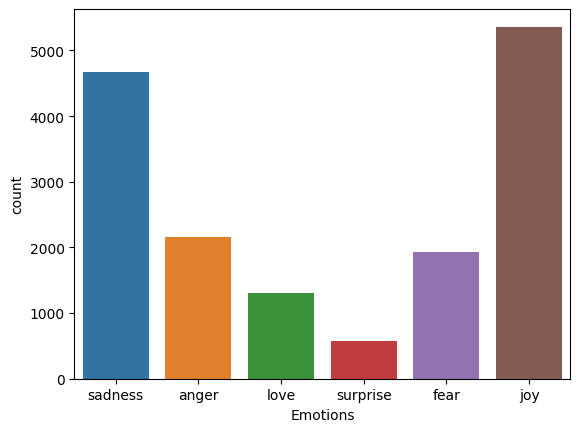

In [7]:
sns.countplot(x = df['Emotions'])
plt.show()

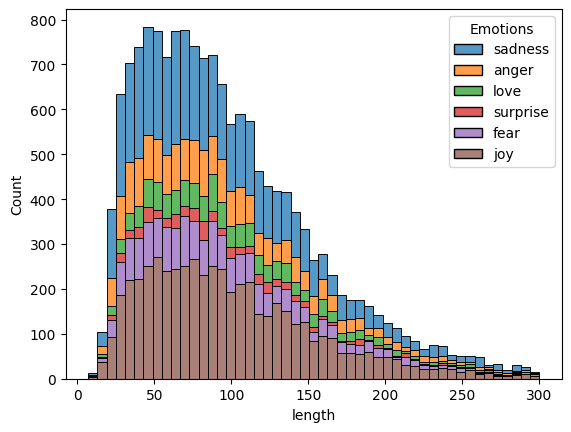

In [8]:
# data distribution
df2 = df.copy()
df2['length'] = [len(x) for x in df2['Comments']]

# Convert the 'length' column to a numpy array
length_values = df2['length'].values

# Use sns.histplot instead of sns.kdeplot for simplicity
sns.histplot(data=df2, x='length', hue='Emotions',multiple = 'stack') # multiple it is used for darkness of colours 

plt.show()

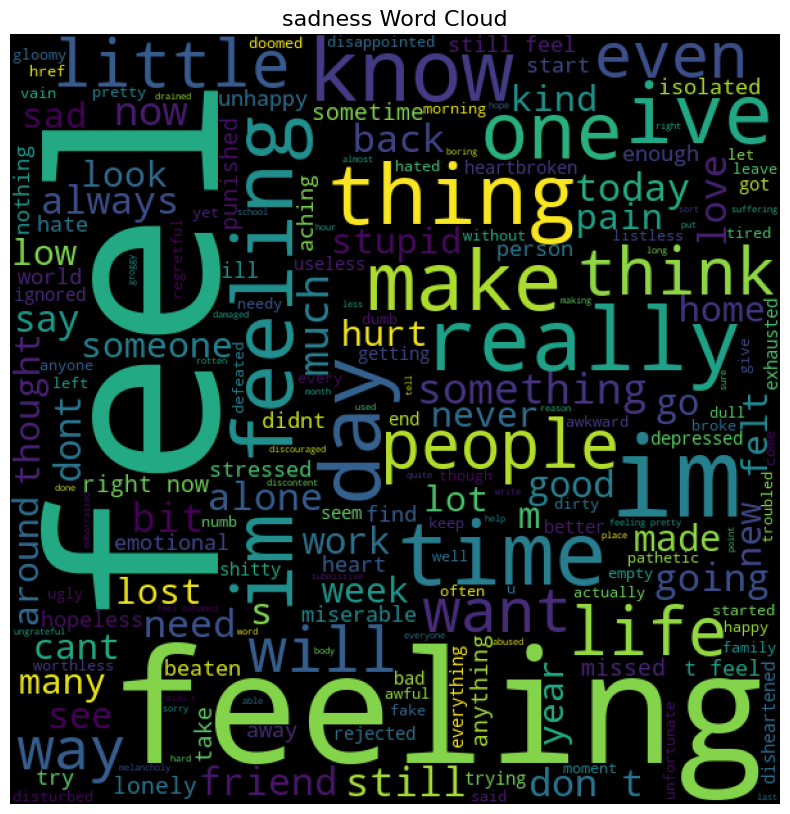

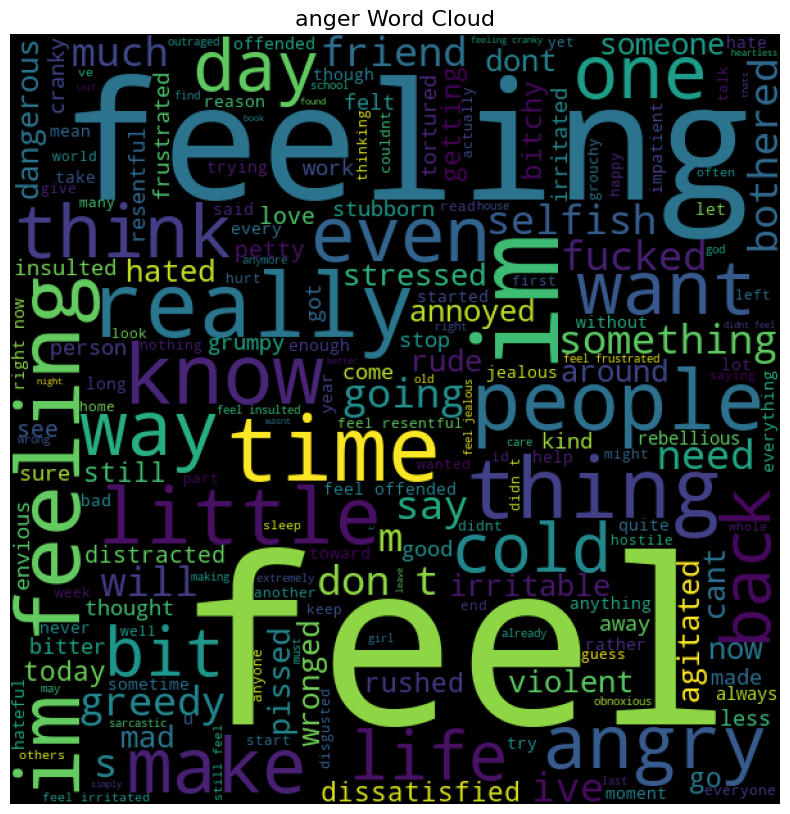

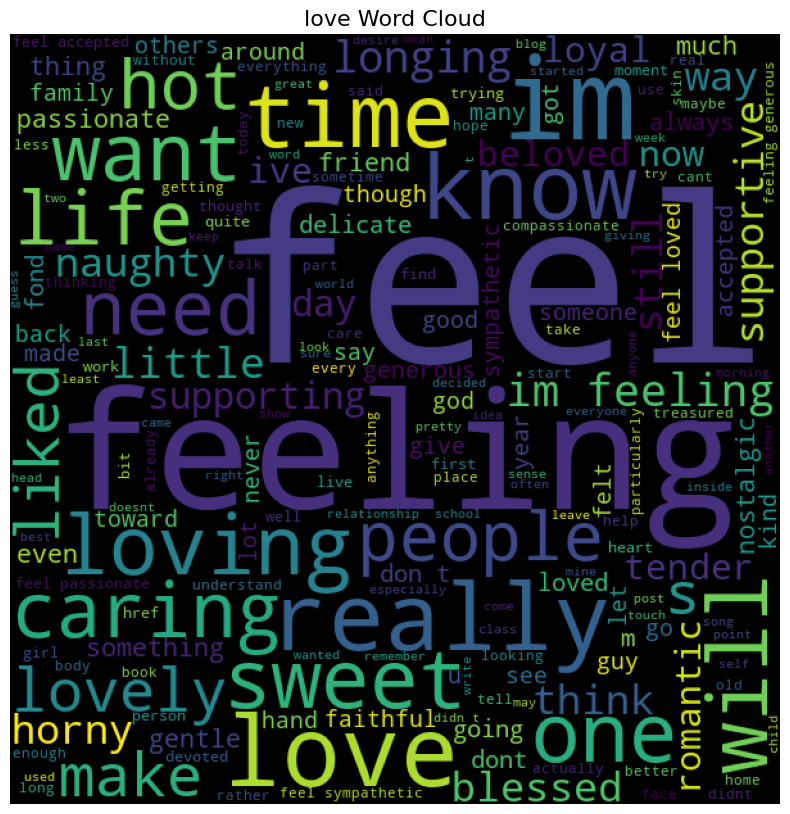

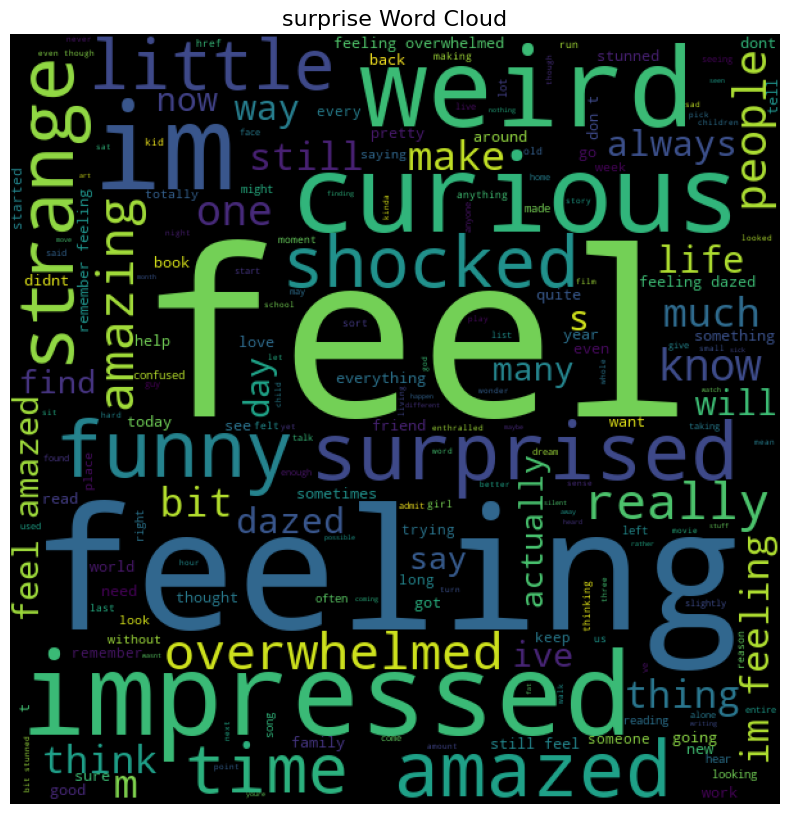

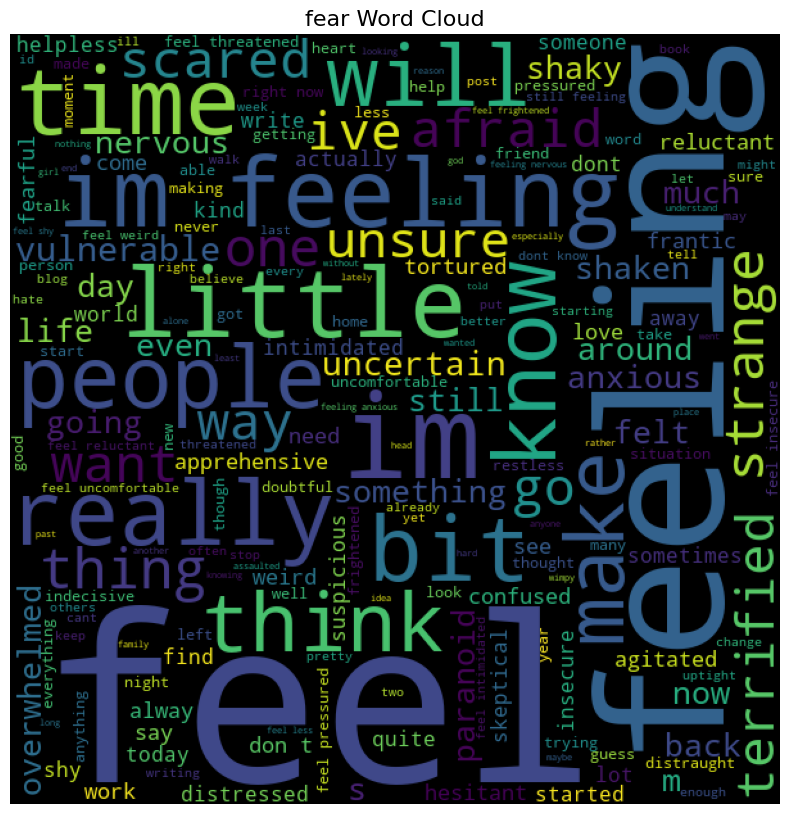

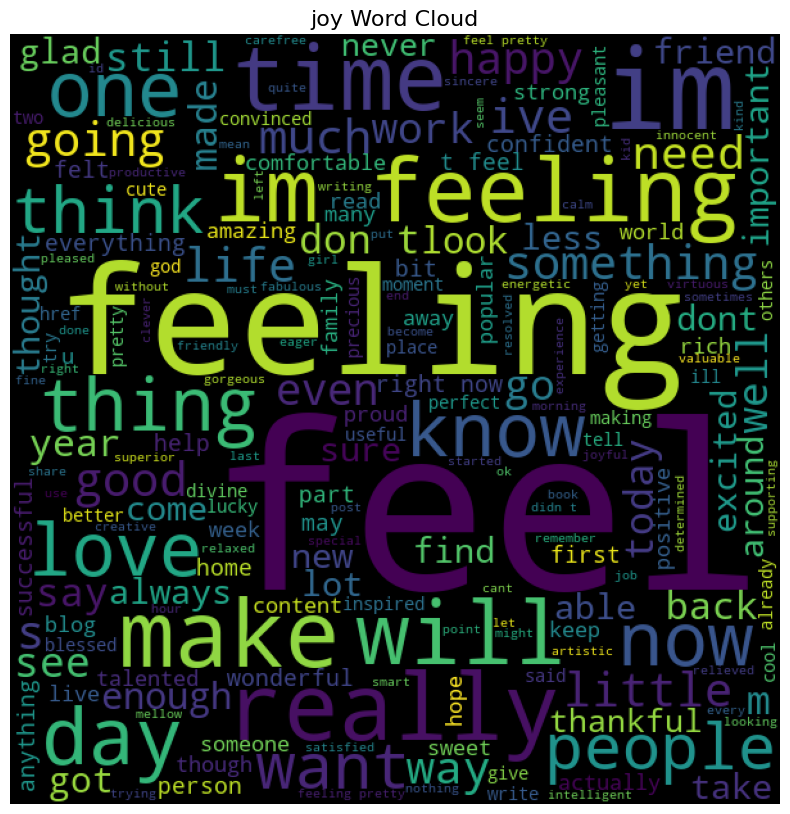

In [9]:
# Words cloud for each emotions
def words_cloud(wordcloud, df3):
    plt.figure(figsize=(10, 10))
    plt.title(df3+' Word Cloud', size = 16)
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
emotions_list = df['Emotions'].unique()
for emotion in emotions_list:
    text = ' '.join([sentence for sentence in df.loc[df['Emotions'] == emotion,'Comments']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)

## APPLYING MACHINE LEARNING

In [10]:
lb = LabelEncoder()
df['Emotions_Encoded'] = lb.fit_transform(df['Emotions'])

In [11]:
df

,Comments,Emotions,Length,Emotions_Encoded
0,i didnt feel humiliated,sadness,23,4
1,i can go from feeling so hopeless to so damned...,sadness,108,4
2,im grabbing a minute to post i feel greedy wrong,anger,48,0
3,i am ever feeling nostalgic about the fireplac...,love,92,3
4,i am feeling grouchy,anger,20,0
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4
15996,i am now turning and i feel pathetic that i am...,sadness,102,4
15997,i feel strong and good overall,joy,30,2
15998,i feel like this was such a rude comment and i...,anger,59,0


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report

In [13]:
# Data Cleaning and preprocessing
# Download NLTK stopwords
df3 = df.copy()
stopwords = set(nltk.corpus.stopwords.words('english'))

In [14]:
def clean_text(text):
    stemmer = PorterStemmer()
    text = re.sub('[^a-zA-Z]',' ',text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    return ' '.join(text)
clean_text('I am 2342 % loving hating,hated,loved') 
df3['Cleaned_Comments'] = df['Comments'].apply(clean_text)

In [15]:
df3

,Comments,Emotions,Length,Emotions_Encoded,Cleaned_Comments
0,i didnt feel humiliated,sadness,23,4,didnt feel humili
1,i can go from feeling so hopeless to so damned...,sadness,108,4,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,anger,48,0,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,love,92,3,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,anger,20,0,feel grouchi
...,...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101,4,brief time beanbag said anna feel like beaten
15996,i am now turning and i feel pathetic that i am...,sadness,102,4,turn feel pathet still wait tabl sub teach degre
15997,i feel strong and good overall,joy,30,2,feel strong good overal
15998,i feel like this was such a rude comment and i...,anger,59,0,feel like rude comment im glad


In [16]:
# Train test Split
X_train,X_test,Y_train,Y_test = train_test_split(df3['Cleaned_Comments'],df3['Emotions_Encoded'],test_size=0.2,random_state=42)

In [17]:
tfidf = TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(X_train)
x_test_tfidf = tfidf.transform(X_test)

In [18]:
classifier = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regresssion' : LogisticRegression(),
    'support vector Machine' : SVC()
}
for name,clf in classifier.items():
    print(f'\n==========={name}===========')
    clf.fit(x_train_tfidf,Y_train)
    y_pred_tfidf = clf.predict(x_test_tfidf)
    print(f'/nAccuracy using TF-IDF: {accuracy_score(Y_test,y_pred_tfidf)}')

    print('Classification Report:')
    print(classification_report(Y_test,y_pred_tfidf))



===========Multinomial Naive Bayes===========
/nAccuracy using TF-IDF: 0.655
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.31      0.46       427
           1       0.91      0.24      0.38       397
           2       0.58      0.98      0.73      1021
           3       1.00      0.03      0.06       296
           4       0.70      0.91      0.79       946
           5       1.00      0.01      0.02       113

    accuracy                           0.66      3200
   macro avg       0.85      0.41      0.41      3200
weighted avg       0.76      0.66      0.58      3200


===========Logistic Regresssion===========


C:\Users\vinay\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/nAccuracy using TF-IDF: 0.829375
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       427
           1       0.84      0.73      0.78       397
           2       0.78      0.94      0.85      1021
           3       0.80      0.49      0.61       296
           4       0.88      0.92      0.90       946
           5       0.77      0.45      0.57       113

    accuracy                           0.83      3200
   macro avg       0.82      0.72      0.76      3200
weighted avg       0.83      0.83      0.82      3200


===========support vector Machine===========
/nAccuracy using TF-IDF: 0.8190625
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.83       427
           1       0.84      0.71      0.77       397
           2       0.76      0.93      0.84      1021
           3       0.81      0.45      0.58       296
           4       0.88  

In [19]:
lr = LogisticRegression()
lr.fit(x_train_tfidf,Y_train)
y_pred_lg = lr.predict(x_test_tfidf)

C:\Users\vinay\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
def predict_emotion(input_text):
    cleaned_text = clean_text(input_text)
    input_vectorizer = tfidf.transform([cleaned_text])
    predict_label = lr.predict(input_vectorizer)[0]
    predicted_emotion = lb.inverse_transform([predict_label])[0]
    label = np.max(lr.predict(input_vectorizer)[0])
    return predicted_emotion,label


In [21]:
sentences = (
            "i didnt feel humiliated",
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "He hates you"
    )
for sentence in sentences:
    print(sentence)
    pred_emotion, label = predict_emotion(sentence)
    print("Prediction :",pred_emotion)
    print("Label :",label)
    print("================================================================")

i didnt feel humiliated
Prediction : sadness
Label : 4
i feel strong and good overall
Prediction : joy
Label : 2
im grabbing a minute to post i feel greedy wrong
Prediction : anger
Label : 0
He was speechles when he found out he was accepted to this new job
Prediction : joy
Label : 2
This is outrageous, how can you talk like that?
Prediction : anger
Label : 0
I feel like im all alone in this world
Prediction : sadness
Label : 4
He is really sweet and caring
Prediction : love
Label : 3
You made me very crazy
Prediction : sadness
Label : 4
i am ever feeling nostalgic about the fireplace i will know that it is still on the property
Prediction : love
Label : 3
i am feeling grouchy
Prediction : anger
Label : 0
He hates you
Prediction : anger
Label : 0


## Saving of Files

In [22]:
# save files
import pickle
pickle.dump(lr,open("logistic_regresion.pkl",'wb'))
pickle.dump(lb,open("label_encoder.pkl",'wb'))
pickle.dump(tfidf,open("tfidf_vectorizer.pkl",'wb'))

## Applying Deep learning Using LSTM

In [22]:
# Text cleaning function
def text_cleaning(df, column, vocab_size, max_len):
    stemmer = PorterStemmer()
    corpus = []

    for text in df[column]:
        text = re.sub("[^a-zA-Z]", " ", text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(word) for word in text if word not in stopwords]
        text = " ".join(text)
        corpus.append(text)

    one_hot_word = [one_hot(input_text=word, n=vocab_size) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=max_len, padding='pre')
    return pad

# Text cleaning and encoding
x_train = text_cleaning(df, "Comments", vocab_size=11000, max_len=300)
lb = LabelEncoder()
df['Emotions'] = lb.fit_transform(df['Emotions'])
y_train = to_categorical(df["Emotions"])

In [23]:
# Build and compile the model
model = Sequential()
model.add(Embedding(input_dim=11000, output_dim=150, input_length=300))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, callbacks=[callback])



Epoch 1/10


250/250 [==============================] - 184s 704ms/step - loss: 1.3823 - accuracy: 0.4732
Epoch 2/10
250/250 [==============================] - 175s 699ms/step - loss: 0.5594 - accuracy: 0.8152
Epoch 3/10
250/250 [==============================] - 178s 713ms/step - loss: 0.2934 - accuracy: 0.9035
Epoch 4/10
250/250 [==============================] - 178s 712ms/step - loss: 0.2083 - accuracy: 0.9326
Epoch 5/10
250/250 [==============================] - 186s 744ms/step - loss: 0.1579 - accuracy: 0.9475
Epoch 6/10
250/250 [==============================] - 178s 714ms/step - loss: 0.1345 - accuracy: 0.9538
Epoch 7/10
250/250 [==============================] - 176s 702ms/step - loss: 0.1152 - accuracy: 0.9616
Epoch 8/10
250/250 [==============================] - 175s 698ms/step - loss: 0.0971 - accuracy: 0.9669
Epoch 9/10
250/250 [==============================] - 178s 713ms/step - loss: 0.0834 - accuracy: 0.9717
Epoch 10/10
250/250 [==============================] - 177s 

In [24]:
# Text cleaning function
def sentence_cleaning(sentence):
    stemmer = PorterStemmer()
    corpus = []
    text = re.sub("[^a-zA-Z]", " ", sentence)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    text = " ".join(text)
    corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=11000) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=300, padding='pre')
    return pad

# load model and predict 
sentences = [
            "i feel strong and good overall",
            "im grabbing a minute to post i feel greedy wrong",
            "He was speechles when he found out he was accepted to this new job",
            "This is outrageous, how can you talk like that?",
            "I feel like im all alone in this world",
            "He is really sweet and caring",
            "You made me very crazy",
            "i am ever feeling nostalgic about the fireplace i will know that it is still on the property",
            "i am feeling grouchy",
            "He hates you"
            ]
for sentence in sentences:
    print(sentence)
    sentence = sentence_cleaning(sentence)
    result = lb.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")

i feel strong and good overall
1/1 [==============================] - 0s 109ms/step
joy : 0.9994134902954102


im grabbing a minute to post i feel greedy wrong
1/1 [==============================] - 0s 210ms/step
anger : 0.9986329674720764


He was speechles when he found out he was accepted to this new job
1/1 [==============================] - 0s 159ms/step
joy : 0.9079472422599792


This is outrageous, how can you talk like that?
1/1 [==============================] - 0s 132ms/step
joy : 0.5362554788589478


I feel like im all alone in this world
1/1 [==============================] - 0s 128ms/step
sadness : 0.9806275963783264


He is really sweet and caring
1/1 [==============================] - 0s 107ms/step
love : 0.7774975895881653


You made me very crazy
1/1 [==============================] - 0s 126ms/step
fear : 0.6048626899719238


i am ever feeling nostalgic about the fireplace i will know that it is still on the property
1/1 [==============================] - 0s 104ms/step

## Saving models and files

In [25]:

model.save('model1.h5')

# Save the LabelEncoder
with open('lb1.pkl', 'wb') as f:
    pickle.dump(lb, f)

# Save vocabulary size and max length
vocab_info = {'vocab_size': 11000, 'max_len': 300}
with open('vocab_info.pkl', 'wb') as f:
    pickle.dump(vocab_info, f)

C:\Users\vinay\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
